<a href="https://colab.research.google.com/github/Vijaya-116/deep-learning-lab/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numpy implementation of a simple recurrent neural network

In [1]:
import numpy as np

# Hyperparameters
input_size = 3
hidden_size = 5
output_size = 2
sequence_length = 4

# Initialize weights and biases
W_xh = np.random.randn(hidden_size, input_size)  # Input to hidden
W_hh = np.random.randn(hidden_size, hidden_size) # Hidden to hidden
W_hy = np.random.randn(output_size, hidden_size) # Hidden to output

b_h = np.zeros((hidden_size, 1))  # Hidden bias
b_y = np.zeros((output_size, 1))  # Output bias

def rnn_step(x, h_prev):
    """Perform one step of RNN forward pass"""
    h = np.tanh(np.dot(W_xh, x) + np.dot(W_hh, h_prev) + b_h)  # Update hidden state
    y = np.dot(W_hy, h) + b_y  # Compute output
    return h, y

def rnn_forward(X):
    """Forward pass through the entire sequence"""
    h_prev = np.zeros((hidden_size, 1))  # Initial hidden state
    outputs = []
    for t in range(sequence_length):
        x = X[:, t].reshape(-1, 1)  # Input at timestep t
        h_prev, y = rnn_step(x, h_prev)
        outputs.append(y)
    return np.array(outputs)

# Dummy input sequence (sequence_length x input_size)
X = np.random.randn(input_size, sequence_length)

# Forward pass
outputs = rnn_forward(X)

print("Outputs for each timestep:")
print(outputs)

Outputs for each timestep:
[[[-0.24924618]
  [-0.0511198 ]]

 [[-0.25297702]
  [ 1.52786556]]

 [[ 0.24991208]
  [-2.39557064]]

 [[ 1.58401401]
  [ 1.09903505]]]


Create a recurrent layer in keras

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

# Hyperparameters
input_shape = (10, 8)  # (sequence_length, input_dim)
hidden_units = 16
output_dim = 1

# Example data
X_train = np.random.rand(100, 10, 8)  # (batch_size, sequence_length, input_dim)
y_train = np.random.rand(100, 1)  # (batch_size, output_dim)

# SimpleRNN model
model_simple_rnn = Sequential([
    SimpleRNN(hidden_units, input_shape=input_shape, return_sequences=False),
    Dense(output_dim)
])

# Compile the model
model_simple_rnn.compile(optimizer='adam', loss='mse')

# Summary of the model
print("SimpleRNN Model:")
model_simple_rnn.summary()

# Train the model
model_simple_rnn.fit(X_train, y_train, epochs=5)

# LSTM model
model_lstm = Sequential([
    LSTM(hidden_units, input_shape=input_shape, return_sequences=False),
    Dense(output_dim)
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse')

# Summary of the model
print("LSTM Model:")
model_lstm.summary()

# Train the model
model_lstm.fit(X_train, y_train, epochs=5)

# GRU model
model_gru = Sequential([
    GRU(hidden_units, input_shape=input_shape, return_sequences=False),
    Dense(output_dim)
])

# Compile the model
model_gru.compile(optimizer='adam', loss='mse')

# Summary of the model
print("GRU Model:")
model_gru.summary()

# Train the model
model_gru.fit(X_train, y_train, epochs=5)

SimpleRNN Model:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5161
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3979 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3945 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3672 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3555 
LSTM Model:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,617 (6.32 KB)

 Trainable params: 1,617 (6.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1433
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0999 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1052
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1078 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1062  
GRU Model:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 16)                  │           1,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,265 (4.94 KB)

 Trainable params: 1,265 (4.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4833
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3503 
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2413 
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1620 
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1230


prepare IMDB data for movie review classification problem

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the data
num_words = 10000  # Number of most frequent words to consider
maxlen = 500       # Maximum length of sequences

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Number of training samples:", len(y_train))
print("Number of testing samples:", len(y_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Testing data shape: (25000, 500)
Number of training samples: 25000
Number of testing samples: 25000


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.6898 - loss: 0.5676 - val_accuracy: 0.8398 - val_loss: 0.3599
782/782 ━━━━━━━━━━━━━━━━━━━━ 281s 360ms/step - accuracy: 0.8352 - loss: 0.3708
Test Loss: 0.36547762155532837
Test Accuracy: 0.8387200236320496


Train the model with embedding and simple RNN layers

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Parameters
num_words = 10000  # Number of most frequent words to consider
maxlen = 500       # Maximum length of sequences
embedding_dim = 128  # Dimension of the embedding vector
rnn_units = 64      # Number of RNN units
batch_size = 64
epochs = 1

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# Define the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(rnn_units, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Training data shape: (25000, 500)
Testing data shape: (25000, 500)
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 268ms/step - accuracy: 0.6094 - loss: 0.6329 - val_accuracy: 0.7942 - val_loss: 0.4730
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7883 - loss: 0.4752
Test Loss: 0.4709
Test Accuracy: 0.7904


plo t the results

313/313 ━━━━━━━━━━━━━━━━━━━━ 90s 279ms/step - accuracy: 0.5754 - loss: 0.6629 - val_accuracy: 0.7096 - val_loss: 0.5577
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7192 - loss: 0.5551
Test Loss: 0.5526
Test Accuracy: 0.7216


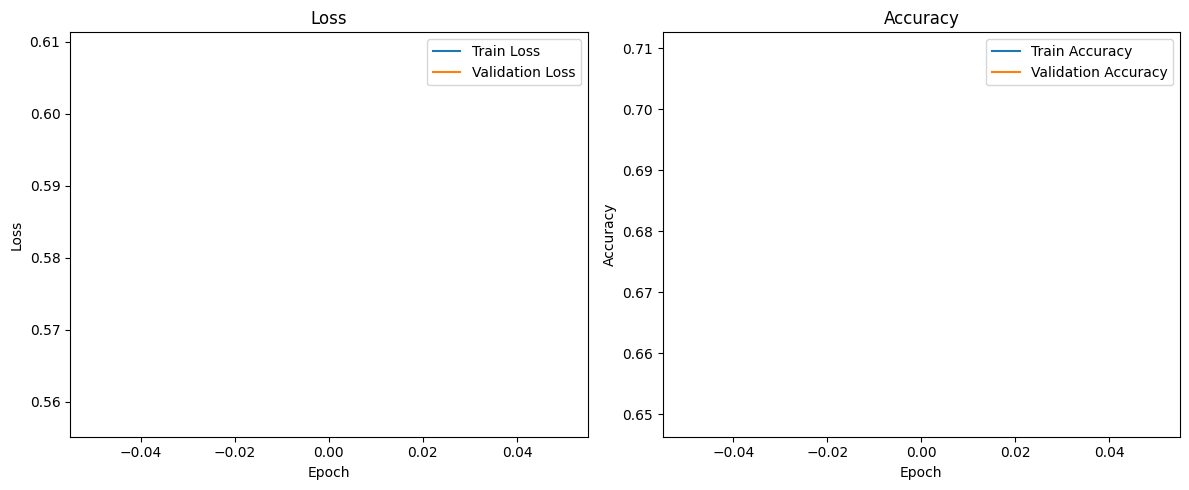

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Parameters
num_words = 10000  # Number of most frequent words to consider
maxlen = 500       # Maximum length of sequences
embedding_dim = 128  # Dimension of the embedding vector
rnn_units = 64      # Number of RNN units
batch_size = 64
epochs = 1

# Load the data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(rnn_units, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Plotting the training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()